<a href="https://colab.research.google.com/github/Farzad-R/LLM-Zero-to-Hundred/blob/master/tutorials/vectorization_tutorial/vectorization_bge_large_zh_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Text Vectorization Using BAAI/bge-large-zh-v1.5

This notebook provides a comprehensive visualization of text vectorization and demonstrates the power of vector search in processing and understanding natural language data. Moreover, it demonstrates the main steps of RAG in a simplified format. </br>

------------------------------------------------------------------------------------
### Dependencies:
To achieve our goals, we rely on the following libraries and models:

>- **BAAI/bge-large-zh-v1.5**: This is the embedding model we use, which has an embedding dimension of 1024. It is designed to capture the semantic meaning of text in a high-dimensional space.
>- **LLAMA 2 7b**
>- **sklearn.metrics.pairwise.cosine_similarity**: : A function from the scikit-learn library that allows us to compute the similarity between vectors.
>- **sklearn.decomposition.PCA**: Another scikit-learn tool that we use to perform Principal Component Analysis (PCA), reducing the dimensionality of our embeddings to 2 and 3 dimensions for visualization purposes.
>- **matplotlib**: A plotting library that enables us to create 2D and 3D plots to visually represent our data.
>- **mplcursors**: An interactive data cursor for matplotlib, which allows us to explore the plots more intuitively.
------------------------------------------------------------------------------------
### Content Overview:

**I. [Define functions](#section_one)** </br>
We define three key functions to streamline our analysis:

>- plot_2D: A function to generate 2D plots of our vectorized text data.
>- get_embedding: This function utilizes our embedding model to convert text into numerical vectors.
>- compare: A utility to compare different text examples based on their vector representations.


**II. [Define examples](#section_two)** </br>
>- We introduce 12 examples spanning 4 distinct categories: animals, sports, modern society, and programming. These examples will serve as the basis for our vectorization and visualization.

**III. [Embedding](#section_three)** </br>
>- Here, we vectorize the examples using our chosen embedding model, transforming the text data into vectors.

**IV. [Apply PCA](#section_four)** </br>
>- We apply PCA to reduce the dimensionality of our embeddings from 1024 to 3 dimensions, making it possible to visualize the data in a lower-dimensional space.

**V. [Plot 2D](#section_five)** </br>
>- In this section, we create 2D plots of our examples to observe how text vectorization distinguishes between different categories.

**VI. [Plot 3D](#section_six)** </br>
>- We extend our visualization to 3D plots, providing another perspective on the separation between categories achieved through vectorization.

**VII. [Computing cosine similarity](#section_seven)** </br>
>- Finally, we compute the cosine similarity between selected examples to illustrate the effectiveness of vector search in identifying similar text data.
------------------------------------------------------------------------------------

#### Simple Retrieval Augmented Generation: (Main steps)

I. [Step 1: Vectorize the user's query](#rag_1)

II. [Step 2: Perfrom vector search between the user's query and the vector database](#rag_2) 

IV. [Step 3: Retrieve the top `n`` results.](#rag_3)

V. [Step 4: Prepare the LLM's input using the retrieved content and the user's query](#rag_4)

Extra. [Extra step for LLAMA: Prepare the model and its tokenizer](#rag_extra)

VI. [Step 5: Pass the input to the LLM and get the response](#rag_5)

------------------------------------------------------------------------------------

Reference:
[Deeplearning.ai](https://www.deeplearning.ai/courses/)

**Install the necessary libraries**

In [1]:
!pip install -q -U FlagEmbedding mplcursors ipympl

**Load the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.decomposition import PCA
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
from FlagEmbedding import FlagModel
# from google.colab import output
# output.enable_custom_widget_manager()

%matplotlib ipympl

**Load the embedding model libraries**

In [3]:
# Load embedding model
embedding_model = FlagModel('BAAI/bge-large-zh-v1.5',
                  query_instruction_for_retrieval="largest animal on the planet",
                  # use_fp16=True
                  )
# Setting use_fp16 to True speeds up computation with a slight performance degradation

<a id=section_one></a>
**Define functions**

**Define functions:** plot_2D, get_embedding, compute_cosine_similarity

In [4]:
def plot_2D(x_values: List[float],
            y_values: List[float],
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]


<a id=section_two></a>
**Let's define 12 Examples in 4 different categories:**

1. Animals
2. Sport
3. Moder society
4. programming

In [5]:
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."


sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."


modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."


programming_sen_1 = "Python developers are wonderful people"
programming_sen_2 = "TypeScript, C++ or Java? All are great!"
programming_sen_3 = "I am a prograamer and my main programming language is C++."


# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3,
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]

<a id=section_three></a>

**Apply Embedding**

In [6]:
embeddings = []
for input_text in all_input_text:
    emb = embedding_model.encode(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

Shape: (12, 1024) 

Sample array: [-0.02     -0.03125   0.007336 ... -0.02635   0.04004   0.00507 ]


<a id=section_four></a>

**Apply PCA**

In [7]:
# Perform PCA for reducing the dimension from 1024 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[ 0.04102801 -0.12329514  0.41542458]
 [ 0.03456425  0.28317395  0.27816056]
 [ 0.13596382  0.51538416  0.25293795]
 [-0.23028755  0.17413757 -0.30094116]
 [-0.39938359  0.12631672 -0.22641098]
 [-0.04341569  0.47129063 -0.2525515 ]
 [-0.33962411 -0.29200898  0.03698021]
 [-0.27277224 -0.22977361  0.25744786]
 [-0.31868788 -0.37949205 -0.01967355]
 [ 0.56488211 -0.12209898  0.1376084 ]
 [ 0.49251833 -0.22631092 -0.24714176]
 [ 0.33521453 -0.19732334 -0.3318406 ]]


<a id=section_five></a>

**2D plot**

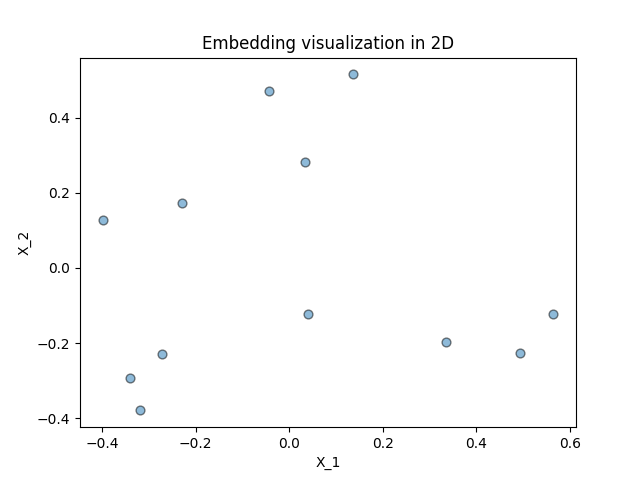

In [8]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

<a id=section_six></a>

**3D plot**

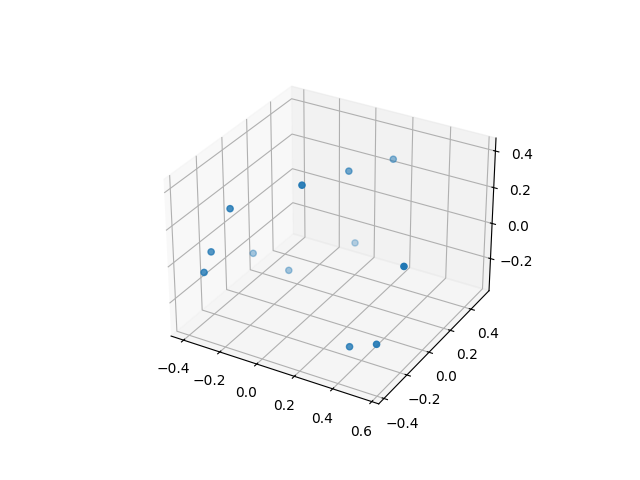

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

<a id=section_seven></a>
**Computing the cosine similarity**

- animal_sen_1: 0, animal_sen_2: 1, animal_sen_3: 2 </br>
- sport_sen_1: 3, sport_sen_2: 4, sport_sen_3: 5</br> 
- modern_society_sen_1: 6, modern_society_sen_2: 7, modern_society_sen_3: 8</br>
- programming_sen_1: 9, programming_sen_2: 10, programming_sen_3: 11

In [10]:
print("animal_sen_1 vs animal_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compute_cosine_similarity(embeddings,0,10))
print("sport_sen_1 vs sport_sen_2:", compute_cosine_similarity(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,11))

animal_sen_1 vs animal_sen_2: 0.47781334472043757
animal_sen_1 vs programming_sen_1: 0.3796271266461645
sport_sen_1 vs sport_sen_2: 0.6136982674058344
sport_sen_1 vs programming_sen_11: 0.42846869114558306


## Simple RAG

Let's consider `embeddings` list to be our Vector database and search a query over it and return the results 

<a id=rag_1></a>
**Step 1: Vectorize the user's query** 

In [11]:
query = "What are some remarkable characteristics of elephants?"
q_v = embedding_model.encode(query)

**First step: Vectorize the query**

In [12]:
query = "What are some remarkable characteristics of elephants?"
q_v = embedding_model.encode(query)

<a id=rag_2></a>
**Step 2: Perfrom vector search between the user's query and the vector database** 

In [13]:
def search(embeddings:List, q_v:List)->List[float]:
    """
    Search for the cosine similarity scores between a query vector (q_v) and a list of embedding vectors.

    Parameters:
        embeddings (List[List[float]]): A list of embedding vectors.
        q_v (List[float]): The query vector for which the cosine similarity scores are calculated.

    Returns:
        List[float]: A list of cosine similarity scores between the query vector and each embedding vector.
    """
    scores = []
    for vec in embeddings:
        scores.append(cosine_similarity([vec], [q_v])[0][0])
    return scores

score_list = search(embeddings, q_v)

<a id=rag_3></a>
**Step 3: Retrieve the top `n` results.**

In [14]:
n = 2
sorted_indices = np.argsort(score_list)[::-1]
top_n_indices = sorted_indices[:n]
top_n_indices

retrieved_content = []
for i in top_n_indices:
    print(all_input_text[i], "\n")
    retrieved_content.append(all_input_text[i])

Elephants are known for their exceptional memory and intelligence, often living in complex social structures. 

The blue whale is the largest animal on the planet, with a heart the size of a small car. 



<a id=rag_4></a>

**Step 4: Prepare the LLM's input using the retrieved content and the user's query**

We want to Pass the retrieved content along with the user's query to a LLM to get the proper response. The role of the LLM is to see whether the retrieved content contain the answer to the user's question and provide a clean and organized response.

In [15]:
llm_system_role = "You are a helpful chatbot. You will receive the user's question along with some\
    retrieved content. Provide the answer if it exists in the retreived content. Do not use your own knowledge\
        if the answer does not exist in the content."
prompt = f"# Your role:{llm_system_role}\n\n# Retrieved content: {retrieved_content}\n\n# User's query: {query}"
print(prompt)


# Your role:You are a helpful chatbot. You will receive the user's question along with some    retrieved content. Provide the answer if it exists in the retreived content. Do not use your own knowledge        if the answer does not exist in the content.

# Retrieved content: ['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.']

# User's query: What are some remarkable characteristics of elephants?


<a id=rag_extra></a>

**Extra step for LLAMA: Prepare the model and its tokenizer**

* **NOTE:** Without quanitzation LLAMA2 7b requires minimum 24 GB of GPU memory. If you are running the model on colab, activate 8bit quantization.

In [16]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    AutoModelForCausalLM,
    )
import torch
import warnings
warnings.filterwarnings("ignore")

In [17]:
# to empty GPU memory (If needed)
del embedding_model
torch.cuda.empty_cache()

In [18]:
llama_models = ["NousResearch/Llama-2-13b-chat-hf", "NousResearch/Llama-2-7b-chat-hf"]
class LlamaModel:
  def __init__(self, quant_eight=False, model="NousResearch/Llama-2-7b-chat-hf"):
    self.base_model = model
    self.quant_eight=quant_eight
    self.quant_eight_config=BitsAndBytesConfig(
        load_in_8bit=True,
        bnb_8bit_quant_type="nf8",
        bnb_8bit_compute_dtype=getattr(torch, "float16"),
        bnb_8bit_use_double_quant=False,
      )
    self.llama_model = self.import_model()
    self.tokenizer_padding_side="right"
    self.tokenizer = self.import_tokenizer()
    print("\nLlama2 and its tokenizer are loaded.\n")

  def import_model(self):
    if self.quant_eight:
      print(f"Importing 8bit {self.base_model} ...\n")
      return AutoModelForCausalLM.from_pretrained(
        self.base_model,
        quantization_config=self.quant_eight_config,
        device_map={"": 0},
    )
    else:
      print(f"Importing 16b {self.base_model} ...\n")
      return AutoModelForCausalLM.from_pretrained(
        self.base_model,
        device_map={"": 0},
    )

  def import_tokenizer(self):
    print("\nImporting tokenizer ...\n")
    return AutoTokenizer.from_pretrained(self.base_model, padding_side=self.tokenizer_padding_side)


  def prepare_prompt_for_llama(self, prompt):
    prompt = f"<s>[INST] {prompt} [/INST]"
    return self.tokenizer(prompt, return_tensors="pt")

In [19]:
llama_instance = LlamaModel(quant_eight=False)

Importing 16b NousResearch/Llama-2-7b-chat-hf ...



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Importing tokenizer ...


Llama2 and its tokenizer are loaded.



In [20]:
result = llama_instance.llama_model.generate(**llama_instance.prepare_prompt_for_llama(prompt).to("cuda"), max_new_tokens=150)
print(llama_instance.tokenizer.batch_decode(result))

["<s><s>[INST] # Your role:You are a helpful chatbot. You will receive the user's question along with some    retrieved content. Provide the answer if it exists in the retreived content. Do not use your own knowledge        if the answer does not exist in the content.\n\n# Retrieved content: ['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.']\n\n# User's query: What are some remarkable characteristics of elephants? [/INST]  Great! Based on the retrieved content, here are some remarkable characteristics of elephants:\n\n1. Exceptional memory: As mentioned in the content, elephants are known for their exceptional memory. They have been observed to remember their herd members, their social hierarchies, and even the location of watering holes and food sources.\n2. Complex social structures: Elephants live in complex social structures, wi

In [21]:
print(animal_sen_1)

Elephants are known for their exceptional memory and intelligence, often living in complex social structures.


LLAMA 7b Answer:

 Great! Based on the retrieved content, here are some remarkable characteristics of elephants:\n\n1. Exceptional memory: As mentioned in the content, elephants are known for their exceptional memory. They have been observed to remember their herd members, their social hierarchies, and even the location of watering holes and food sources.\n2. Complex social structures: Elephants live in complex social structures, with females often forming close bonds with each other and males often forming bachelor groups. They have been observed to display empathy and cooperation within their social groups.\n\nI hope this helps! Let me know if you have any other questions.